In [29]:
import pandas as pd                
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns

In [30]:
path = 'https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv'

df = pd.read_csv(path, header=0)

In [31]:
df.head()

,year,id,wrkstat,wrkslf,wrkgvt,marital,sibs,childs,age,educ,...,south,divlaw2,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,age2,relig2,dem,science_quiz.f
0,2012,1.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,1.0,0.0,22.0,4 years,...,Nonsouth,More difficult,22.0,0.0,0.0,NaN,<=30,Catholic,0.0,NaN
1,2012,2.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,2.0,0.0,21.0,12th grade,...,Nonsouth,NaN,21.0,0.0,0.0,100.0,<=30,Catholic,0.0,7.0
2,2012,3.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Married,1.0,2.0,42.0,12th grade,...,Nonsouth,NaN,42.0,1.0,100.0,100.0,>=31,Protestant,0.0,10.0
3,2012,4.0,NaN,SOMEONE ELSE,PRIVATE,Married,2.0,2.0,49.0,1 yr coll,...,Nonsouth,Same/easier,49.0,NaN,NaN,100.0,>=31,Protestant,0.0,NaN
4,2012,5.0,RETIRED,SOMEONE ELSE,GOVERNMENT,Separated,0.0,3.0,70.0,4 years,...,Nonsouth,Same/easier,70.0,NaN,NaN,0.0,>=31,Protestant,1.0,4.0


In [32]:
df1 = df[['income06', 'educ']]

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   income06  1758 non-null   object
 1   educ      1972 non-null   object
dtypes: object(2)
memory usage: 31.0+ KB


1.

<AxesSubplot:ylabel='educ'>

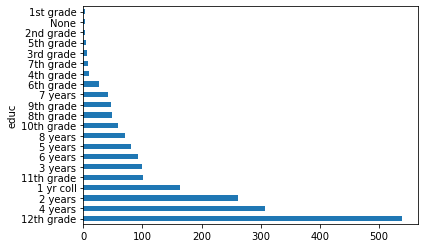

In [34]:
df1.groupby('educ').size().sort_values(ascending=False).plot(kind = 'barh')

<AxesSubplot:ylabel='income06'>

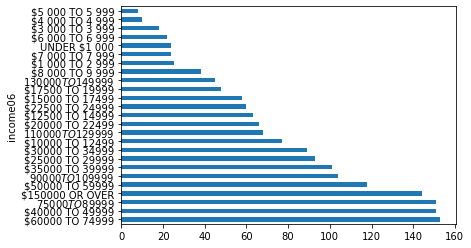

In [35]:
df1.groupby('income06').size().sort_values(ascending=False).plot(kind = 'barh')

2.

In [36]:
df1 = df.rename(columns= {'income06':'income', 'educ':'education_level'})
df1.columns

Index(['year', 'id', 'wrkstat', 'wrkslf', 'wrkgvt', 'marital', 'sibs',
       'childs', 'age', 'education_level',
       ...
       'south', 'divlaw2', 'age.f', 'mslm_spk.high', 'mslm_spk.yes',
       'grass.legal', 'age2', 'relig2', 'dem', 'science_quiz.f'],
      dtype='object', length=221)

In [37]:
def Income(s):
    
    if s == 'UNDER $1 000':
        a = 0
        
    elif s[0] == '$':
        a = ''
        for i in s[1:]:
            if i.lower() < 'a':
                a += i
            else:
                break
        a = int(a.replace(' ', ''))
        
    else:
        print('error')
        print(s)
    return a

In [38]:
df1['inc1'] = df1.income.dropna().apply(Income)

In [39]:
df1.inc1.unique()

array([150000., 110000., 130000.,  50000.,  25000.,  30000.,   5000.,
            0.,   8000.,  22500.,     nan,  40000.,  60000.,  90000.,
        75000.,  35000.,  15000.,  20000.,   6000.,  17500.,  12500.,
        10000.,   1000.,   7000.,   4000.,   3000.])

In [40]:
df1[['income', 'inc1']].head(20)

,income,inc1
0,$150000 OR OVER,150000.0
1,$150000 OR OVER,150000.0
2,$110000 TO $129999,110000.0
3,$130000 TO $149999,130000.0
4,$50000 TO 59999,50000.0
5,$25000 TO 29999,25000.0
6,$30000 TO 34999,30000.0
7,$5 000 TO 5 999,5000.0
8,UNDER $1 000,0.0
9,$30000 TO 34999,30000.0


In [41]:
df.educ.unique()

array(['4 years', '12th grade', '1 yr coll', '7 years', '3 years',
       '11th grade', '9th grade', '5 years', '10th grade', '4th grade',
       'None', '2 years', '6 years', '8 years', '8th grade', '6th grade',
       '5th grade', '7th grade', nan, '3rd grade', '1st grade',
       '2nd grade'], dtype=object)

In [42]:
edu_type = ['8 years',
            '7 years',
            '6 years',
            '5 years',
            '4 years',
            '3 years',
            '2 years',
            '1 yr coll',
            '12th grade',
            '11th grade',
            '10th grade',
            '9th grade',
            '8th grade',
            '7th grade',
            '6th grade',
            '5th grade',
            '4th grade',
            '3rd grade',
            '2nd grade',
            '1st grade',
            'None']

In [43]:
d2 = {key: len(edu_type)-i-1 for i, key in enumerate(edu_type)}

In [44]:
d2

{'8 years': 20,
 '7 years': 19,
 '6 years': 18,
 '5 years': 17,
 '4 years': 16,
 '3 years': 15,
 '2 years': 14,
 '1 yr coll': 13,
 '12th grade': 12,
 '11th grade': 11,
 '10th grade': 10,
 '9th grade': 9,
 '8th grade': 8,
 '7th grade': 7,
 '6th grade': 6,
 '5th grade': 5,
 '4th grade': 4,
 '3rd grade': 3,
 '2nd grade': 2,
 '1st grade': 1,
 'None': 0}

In [45]:
df1['education_level2'] = df1.education_level.map(d2)

In [46]:
df1[['education_level','education_level2']].head(17)

,education_level,education_level2
0,4 years,16.0
1,12th grade,12.0
2,12th grade,12.0
3,1 yr coll,13.0
4,4 years,16.0
5,7 years,19.0
6,3 years,15.0
7,11th grade,11.0
8,9th grade,9.0
9,5 years,17.0


In [47]:
def Degree(x):
    if x >=0:
        if x <= 12:
            return 'High School And Below'
        elif (x>12) & (x<17):
            return 'Some College'
        elif x >= 17:
            return 'College and Beyond'
        else:
            return np.nan

In [48]:
df1['degree'] = df1.education_level2.apply(Degree)

In [49]:
df1[['education_level','education_level2','degree']]

,education_level,education_level2,degree
0,4 years,16.0,Some College
1,12th grade,12.0,High School And Below
2,12th grade,12.0,High School And Below
3,1 yr coll,13.0,Some College
4,4 years,16.0,Some College
...,...,...,...
1969,4 years,16.0,Some College
1970,1 yr coll,13.0,Some College
1971,1 yr coll,13.0,Some College
1972,12th grade,12.0,High School And Below


In [56]:
df1.groupby(['degree', 'wrkstat'])['inc1'].mean()

degree                 wrkstat             
College and Beyond     KEEPING HOUSE           105615.384615
                       RETIRED                  76125.000000
                       SCHOOL                   73750.000000
                       TEMP NOT WORKING         98333.333333
                       UNEMPLOYED, LAID OFF     51000.000000
                       WORKING FULL TIME        89129.629630
                       WORKING PART TIME        76363.636364
High School And Below  KEEPING HOUSE            25450.495050
                       RETIRED                  28467.741935
                       SCHOOL                   43785.714286
                       TEMP NOT WORKING         35269.230769
                       UNEMPLOYED, LAID OFF     29720.000000
                       WORKING FULL TIME        44796.610169
                       WORKING PART TIME        34691.011236
Some College           KEEPING HOUSE            51882.352941
                       RETIRED           

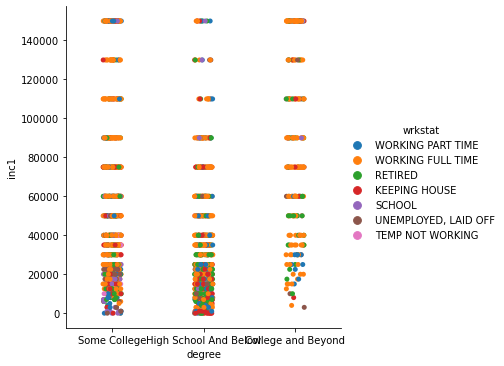

In [60]:
sns.catplot(x="degree", y="inc1", hue='wrkstat',
           data=df1)

3. I used the wrkstat variable as the second categorial variable for the strip plot. The variable wrkstat represents one's current working situation. According to the findings, majority of the respondents who either have some college or high school education make less than $20,000 annually. That is not the case for those who have graduated from college, thus proving my hypothesis that income is impacted by one's level of education. One way to improve the analysis is to run additional statistical tests.